In [77]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [78]:
img_rgb = cv2.imread('../Supermarket_2015-02-15.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [173]:
template = cv2.imread('../bud_light.png',0)

In [174]:
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    print pt[0]
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 3)

In [175]:
h

134

In [176]:
cv2.imwrite('res.png',img_rgb)

True

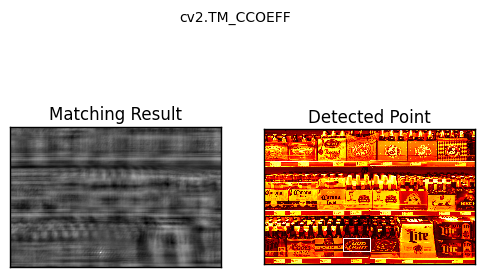

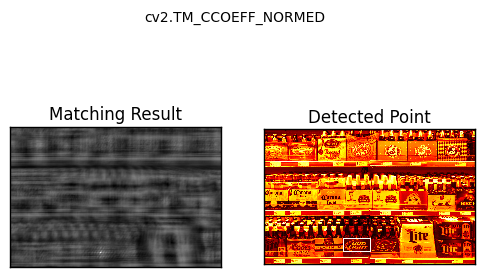

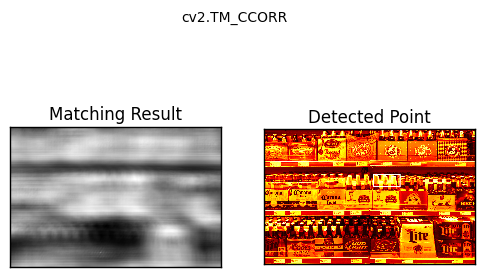

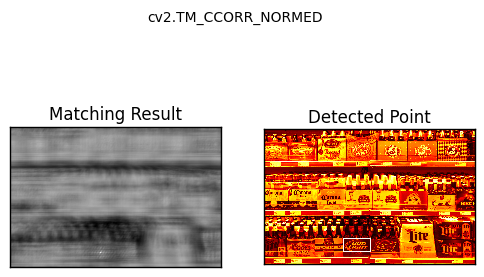

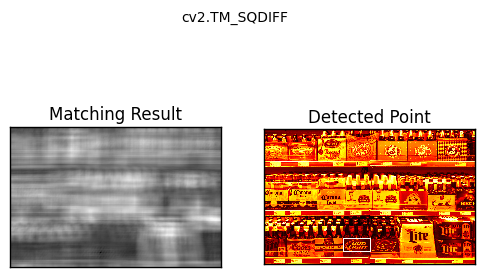

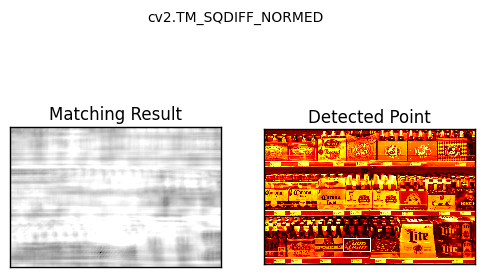

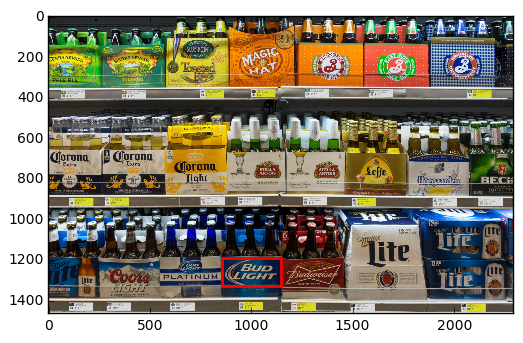

In [177]:
import cv2
import scipy
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import scipy.misc as imsave
import matplotlib.image as mpimg
import matplotlib.patches as patches
%matplotlib inline

#img = cv2.imread('../Supermarket_2015-02-15.jpg')
#img = 

img = cv2.imread('../Supermarket_2015-02-15.jpg',0)
img = scipy.misc.imresize(img, 0.50)
img2 = img.copy()
template = cv2.imread('../bud_light.png',0)
w, h = template.shape[::-1]
# img = cv2.imread('../shelf2.jpg',0)
# #img = scipy.misc.imresize(img, 0.05)
# img2 = img.copy()
# template = cv2.imread('../shelf_budweiser.png',0)
# w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    img3 = img.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right,(255, 0, 0),10)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img, cmap = 'hot')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()

img4 = scipy.misc.imresize(np.array(Image.open('../Supermarket_2015-02-15.jpg'), dtype=np.uint8),0.50)
fig,ax = plt.subplots(1)
ax.imshow(img4)
rect = patches.Rectangle((top_left[0],bottom_right[1]),(bottom_right[0]-top_left[0]),(top_left[1]-bottom_right[1]),linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

    

In [168]:
top_left

(1244, 168)